## Propagation of deformable mirror coupled speckle at the output of the fiber

A Step-Index fiber is used

### Imports

In [17]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.speckle import DegenStepIndexSpeckle
from mmfsim.coupling import StepIndexFiberDegenCoupler
from mmfsim.datasets import SimulatedStepIndexSpeckleOutputDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Functions

In [2]:
def numerical_aperture_to_n2(NA: float, n1: float) -> float:
    return np.sqrt(np.square(n1) - np.square(NA))

### Setup

Set the computation grid and the fiber characteristics

In [12]:
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'NA': 0.22}
fiber_settings['n2'] = numerical_aperture_to_n2(NA=fiber_settings['NA'], n1=fiber_settings['n1'])
fiber_settings.pop('NA')

fiber_type: str = 'step'
grid_settings: dict = {'pixel_size': 0.7e-6, 'pixel_numbers': (128, 128)}
dataset_settings: dict = {'length': 1, 'degen': True, 'phases_dim': (12,12)}
fourier_settings: dict = {'pad': 1}
export_settings: dict = {'return_output_fields': True, 'add_exp_noise': False, 'noise_func': np.max, 'file_type': 'matlab'}

### Dataset generation

Generate the grid and the fiber

In [13]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber = GrinFiber(**fiber_settings)
elif fiber_type.lower() in ['step', 'si']:
    fiber = StepIndexFiber(**fiber_settings)
else:
    raise ValueError(f"Unknown fiber type.")
print(fiber)

c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:248: RuntimeWarning: invalid value encountered in divide
  return sp.jv(n, u) / (u * sp.jv(n - 1, u)) + sp.kn(n, w) / (w * sp.kn(n - 1, w))
c:\users\saucourt\coding\mmf_lp_modes\mmfsim\fiber.py:247: RuntimeWarning: invalid value encountered in sqrt
  w = np.sqrt(v**2 - u**2)


StepIndexFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.4483870339104807
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.220
  - Number of guided LP modes: 140
  - Number of guided LP modes (counting degenerates): 269
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46491477  0.          0.          1.        ]
 [ 1.46478363  2.          1.          1.        ]
 [ 1.46461132  4.          2.          1.        ]
 [ 1.46455097  1.          0.          2.        ]
 [ 1.46440012  6.          3.          1.        ]
 [ 1.46427476  3.          1.          2.        ]
 [ 1.46415142  8.          4.          1.        ]
 [ 1.46395609  5.          2.          2.        ]
 [ 1.46389666  2.          0.          3.        ]
 [ 1.46386618 10.          5.          1.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

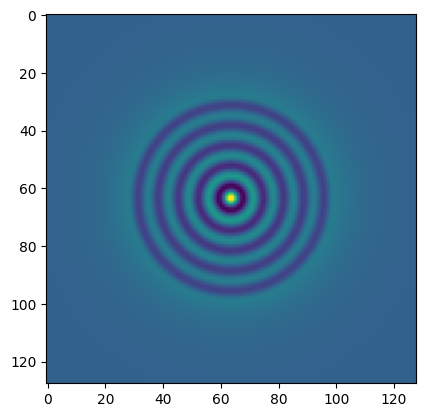

In [14]:
fiber.compute_modes_fields(grid)
plt.imshow(fiber._modes[:,:,1,-1])

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'GRIN fiber speckle (269 modes)'}, xlabel='x [um]', ylabel='x [um]'>,
 <matplotlib.image.AxesImage at 0x1a18de5edf0>)

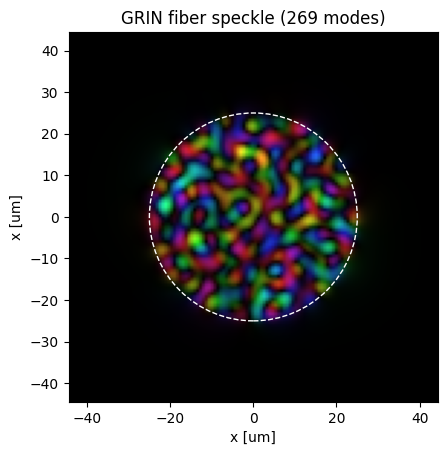

In [16]:
speckle = DegenStepIndexSpeckle(fiber, grid, N_modes = fiber._N_modes_degen)
speckle.compose()
speckle.plot(complex=True, complex_hsv=True)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'GRIN fiber speckle (269 modes)'}, xlabel='x [um]', ylabel='x [um]'>,
 <matplotlib.image.AxesImage at 0x1a1979047c0>)

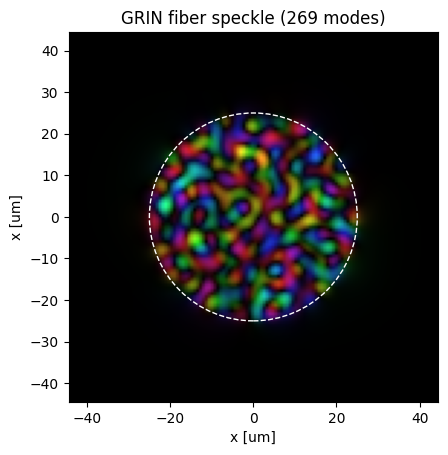

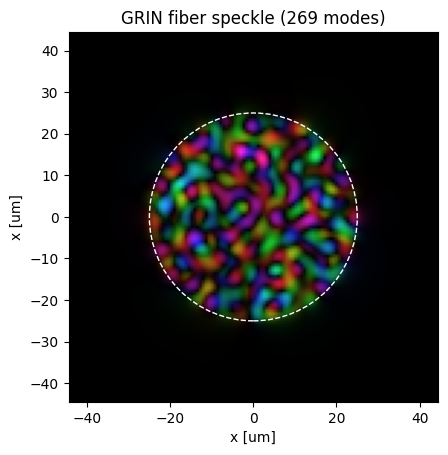

In [40]:
from copy import deepcopy

coupled_in = StepIndexFiberDegenCoupler(speckle.field, grid, fiber, N_modes=fiber._N_modes_degen)
# coupled_in_conj = StepIndexFiberDegenCoupler(speckle.field, grid, fiber, N_modes=fiber._N_modes_degen)
coupled_in_conj = StepIndexFiberDegenCoupler(np.conj(speckle.field), grid, fiber, N_modes=fiber._N_modes_degen)

coupled_in.plot(complex=True, complex_hsv=True)
coupled_in_conj.plot(complex=True, complex_hsv=True)



(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'GRIN fiber speckle (269 modes)'}, xlabel='x [um]', ylabel='x [um]'>,
 <matplotlib.image.AxesImage at 0x1a19739b100>)

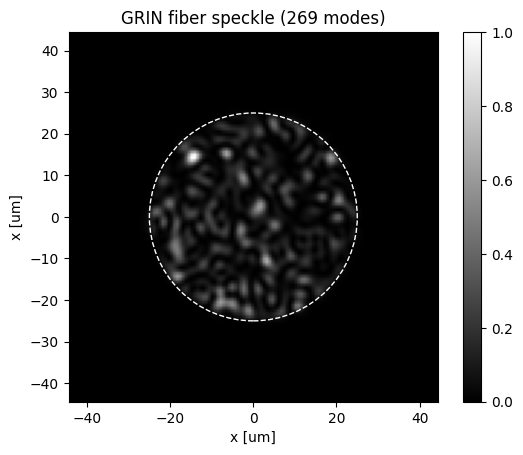

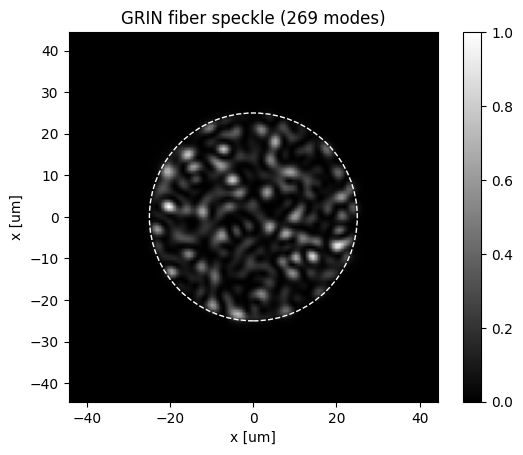

In [41]:
coupled_out = coupled_in.propagate(full=False)
coupled_out_conj = coupled_in_conj.propagate(matrix=coupled_in.coupling_matrix)

speckle_out = DegenStepIndexSpeckle(fiber, grid, N_modes = fiber._N_modes_degen)
speckle_out.field = coupled_out

speckle_out_conj = DegenStepIndexSpeckle(fiber, grid, N_modes = fiber._N_modes_degen)
speckle_out_conj.field = coupled_out_conj


speckle_out.plot()
speckle_out_conj.plot()